## Carga de imagenes para modelo de clasificación con Keras
En este laboratorio se da una pequeña introducción a dos de las formas más comunes de formato en que vienen las imagenes para un modelo de clasificación.

Hay dos formatos muy comunes en los que vienen muchos de los set de datos de imagenes de clasificación:


1.  **Imagenes + csv con etiquetas:** En esta, tenemos todas las imagenes en una carpeta y viene un excel o csv que indica la clase de cada una de las imagenes por medio del id/nombre de la imagen
2.   **Imagenes divididas por carpetas:** Las imagenes vienen divididas en k carpetas, donde k es el número de clases del problema.

Para ambos formatos, hay formas sencillas de cargar los datos para crear el modelo en keras.





### 1. Imagenes + csv con etiquetas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorio (asegurarse de dar permisos de acceso al Drive para cargar los datos)
from google.colab import drive
drive.mount('/content/drive')
directorio = "/content/drive/MyDrive/MACD/Estudiantes/Datos/CIFAR10_sample_traincsv"
# Leer el csv como un dataframe
df = pd.read_csv(directorio + "/trainLabels.csv")
display(df.head())
# Agregamos el png para que el nombre sea 100% concorde a lo que tenemos
df["id"] = df["id"].astype(str) + ".png"
display(df.head())

# Creando el set de datos
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=directorio + "/images",
    x_col='id',
    y_col='label',
    batch_size=6,
    class_mode='categorical',
    shuffle=True
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


,id,label
0,1.png,frog
1,2.png,truck
2,3.png,truck
3,4.png,deer
4,5.png,automobile


Found 12 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 49988 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Total de observaciones: 12
Nombres de las clases: {'automobile': 0, 'bird': 1, 'cat': 2, 'deer': 3, 'frog': 4, 'horse': 5, 'ship': 6, 'truck': 7}
Observaciones por clase: {0: 2, 1: 1, 2: 1, 3: 2, 4: 1, 5: 2, 6: 1, 7: 2}
(6, 256, 256, 3)


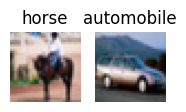

In [ ]:
# Explorando el data_generator
import numpy as np
import matplotlib.pyplot as plt
print(f"Total de observaciones: {data_generator.n}")
print(f"Nombres de las clases: {data_generator.class_indices}")
unique, counts = np.unique(data_generator.classes, return_counts=True)
print(f"Observaciones por clase: {dict(zip(unique, counts))}")

# Un batch
images, labels = next(data_generator)
print(images.shape)

# Mostrar un par de imagenes
num_display = 2
class_indices = data_generator.class_indices
plt.figure(figsize=(2, 2))
for i in range(num_display):
    plt.subplot(1, num_display, i + 1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    # Mapeo de etiqueta a número de clase
    class_label = list(class_indices.keys())[list(class_indices.values()).index(class_index)]
    plt.title(class_label)
    plt.axis('off')
plt.show()

### 2. Imagenes divididas por carpetas

In [2]:
from tensorflow import keras
directoriofolder = "/content/drive/MyDrive/MACD/Estudiantes/Datos/CIFAR10_sample_trainfolder"
data_train, data_val = keras.utils.image_dataset_from_directory(
    directoriofolder,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    shuffle=True,
    seed=1234,
    validation_split=0.3,
    subset="both"
)



Found 12 files belonging to 8 classes.
Using 9 files for training.
Using 3 files for validation.


In [5]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Características:
import numpy as np
print(data_train.class_names)
# Initialize a dictionary to count observations per category
observations_per_category = {class_name: 0 for class_name in data.class_names}

# Mostrar el número de observaciones por categoría
for images, labels in data_train:
    labels = labels.numpy()
    # Conteo
    unique, counts = np.unique(labels, return_counts=True)
    # Añadiendo a diccionario
    for idx, count in zip(unique, counts):
        observations_per_category[data_train.class_names[idx]] += count

print("Number of observations per category:")
for class_name, count in observations_per_category.items():
    print(f"  {class_name}: {count}")

['automobile', 'bird', 'cat', 'deer', 'frog', 'horse', 'ship', 'truck']
Number of observations per category:
  automobile: 2
  bird: 1
  cat: 0
  deer: 1
  frog: 0
  horse: 2
  ship: 1
  truck: 2


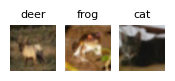

In [ ]:
import matplotlib.pyplot as plt
ejemplos = 3
# Ejemplo para graficar
for images, labels in data_val.take(1):
    plt.figure(figsize=(2, 2))
    for i in range(ejemplos):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_val.class_names[labels[i]], fontsize=8)
        plt.axis("off")
    plt.show()

Keras utiliza esta forma de cargar los datos porque es eficiente a nivel de uso de memoria. Entre las razones por las que es eficente están:
1. Uso de batches/lotes en lugar de cargar todos los datos en memoria a la vez
2. Carga en el momento: En lugar de pre-cargar todas las imagenes en meomria, se van cargando por lotes en el momento que se usan en el entrenamiento.